## DSCI 225: Final Project
----
#### NHL Concussion Data Analytics

##### Jacy Werner

##### April 24th, 2025

----

*Please run the following cell of code to set things up:*

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NHL Concussions Database_data.csv")
df.head()

,Season,Team,Position,Player,Injury Type,Cap Hit,Chip,Games Missed,Games Missed.1
0,2012/13,Boston,F,"Bergeron, Patrice",Concussion,5.0,365.853659,6,6
1,2012/13,Boston,F,"Marchand, Brad",Concussion,2.5,60.975610,2,2
2,2012/13,Boston,F,"Thornton, Shawn",Concussion,1.1,26.829268,2,2
3,2012/13,Carolina,F,"LaRose, Chad",Concussion,1.7,207.317073,10,10
4,2012/13,Carolina,F,"Semin, Alexander",Concussion,7.0,170.731707,2,2


----

#### Introduction

&nbsp;&nbsp;&nbsp;&nbsp;As both a neuroscience concentration student and an athlete with personal experience suffering from multiple concussions. I've long been intrigued by the impact of traumatic brain injuries on a indivuals performance and long-term health. This project allows me to combine both my academic interest with my athletic background to explore real-world concussion data. By analyzing trends in concussion frequency, recovery time and risk by player position, I hope to better understand the patterns and consequences of concussions in professional hockey. Which leads me to my research question:
* Are certain positions (forward, defensemen, goalies, etc.) more prone to concussions?
* Is there a correlation between concussion frequency and player recovery?

&nbsp;&nbsp;&nbsp;&nbsp;A concussion occurs when the brain twists or moves inside of the skull, this can happen from a "bump, blow or jolt" of the head. The brain is made of approximately 86 billion neurons, when this trauma occurs, the neurons axon (which sends communicating signals throughout the brain and body) stretches and even tears, which releases toxins, ultimately killing other neurons in the process. This action can cause headaches, mood swings, difficulty learning, memorization and many more symtoms. While concussions are considered a head injury, they can be easily curable with rest and recovery. 

&nbsp;&nbsp;&nbsp;&nbsp;The issue arises from when a second concussion occurs before the first one heals. This is called second impact syndrome. The brain loses the ability to regulate blood pressure and begins to swell drastically. SIS can cause perminant effects and even death, which is why proper recovery time is extremely important for these high contact sports. 

&nbsp;&nbsp;&nbsp;&nbsp;This project uses data from the "NHL Concussion Database(2012-2023) from Kaggle. This data is recorded instances of player concussions across NHL teams. The dataset includes player names, team, position, cap hit, and the number of games missed due to a concussion. Additionally it distinguishes between regular season and playoff injuries.

----

#### Data Cleaning

To begin, we first need to clean the data by removing duplicates, handling missing points, and standardizing player positions:

- Read CSV: Module 0
- Data Cleaning: Module 2 & 3
- Convert to categorical: Module 5
- Datetime and Sorting: Module 5

----

In [162]:
df = pd.read_csv("NHL Concussions Database_data.csv")

df = df.drop_duplicates()
df = df.dropna(subset=['Position', 'Games Missed'])

position_map = {'F': 'Forward', 'D': 'Defenseman', 'G': 'Goalie'}
df['Position'] = df['Position'].map(position_map).fillna(df['Position'])

df['Position'] = pd.Categorical(df['Position'], categories=['Forward', 'Defenseman', 'Goalie'], ordered=False)
df['Season'] = pd.Categorical(df['Season'])

----

#### Exploratory Data Analysis

Now that the dataset is clean, we can now perform data analysis to understand overall patterns and trends. These visualizations can provide key insights into the structure of the data and guide deeper analysis:

- Value counts, groupby, mean, plotting (matplotlib): Module 2, 3, 4
- Pivot Tables: Module 5

----

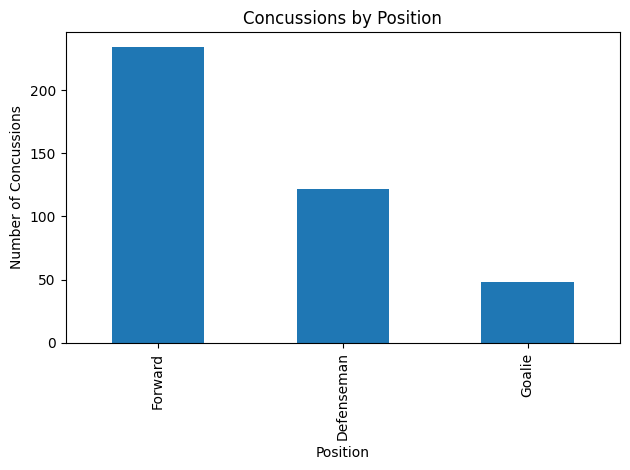

Position
Forward       234
Defenseman    122
Goalie         48
Name: count, dtype: int64

In [165]:
df['Position'].value_counts().plot(kind='bar', title='Concussions by Position')
plt.xlabel("Position")
plt.ylabel("Number of Concussions")
plt.tight_layout()
plt.show()

df['Position'].value_counts()

* This plot highlights the total number of concussions experienced by players at each position (between the years of 2012 and 2023). We can see that "Forwards" account for the highest number of concussions by a large margine with 234, followed by defensement with 122. Goalies experience the least amount of concussions with 48. This pattern can reflect the differences in play style and physical exposure. With forwards engaging in the most contact, while goalies are more protected with stationary play.

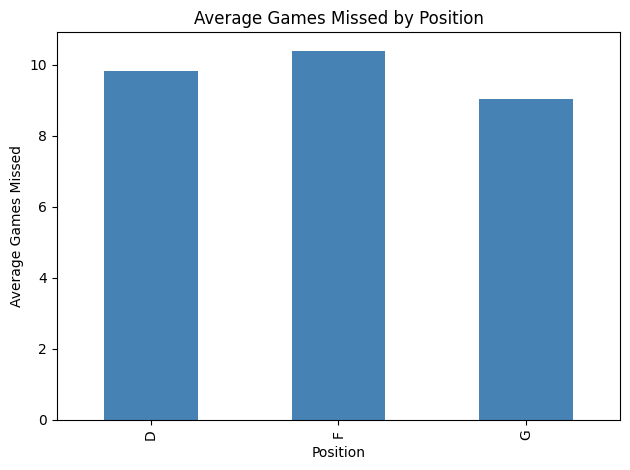

Position
D     9.819672
F    10.397436
G     9.041667
Name: Games Missed, dtype: float64


In [248]:
df.groupby('Position', observed=True)['Games Missed'].mean().plot(
    kind='bar',
    title='Average Games Missed by Position',
    color='steelblue'
)
plt.xlabel('Position')
plt.ylabel('Average Games Missed')
plt.tight_layout()
plt.show()

averages = df.groupby('Position', observed=True)['Games Missed'].mean()
print(averages)

* This chart shows the average number of games missed due to concussions by player position. On average, forwards miss the most games with approximately 10.4, follow by defensemen with approximately 9.8. Goalies miss the least amount of games with approximately 9.04 games missed on average. 

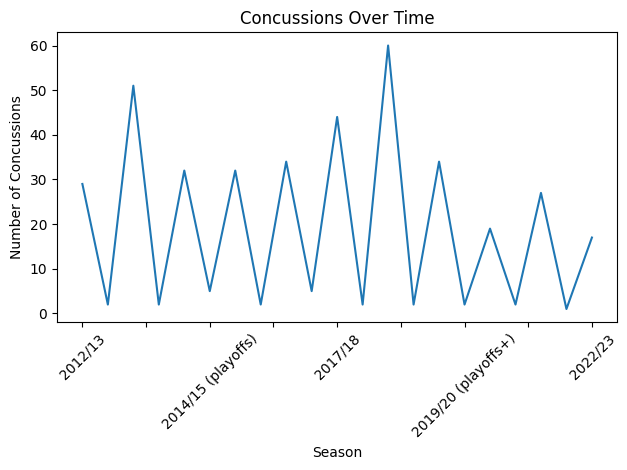

In [176]:
df['Season'].value_counts().sort_index().plot(kind='line', title='Concussions Over Time')
plt.xticks(rotation=45)
plt.ylabel("Number of Concussions")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

* This line graph shows fluctuation in concussion reports across NHL seasons from 2012 to 2023. With a recent pandemic and the change of contact policy, it is important to take notes in potential data altercations.

----

#### Statistical Analysis

Expanding beyond basic visual summaries, we can use more advanced tools including: 

- Pivot Tables: Module 5
- Boolean indexing: Module 4
- Hierarchical grouping: Module 3

This allows for richer pattern recognition in the dataset

----

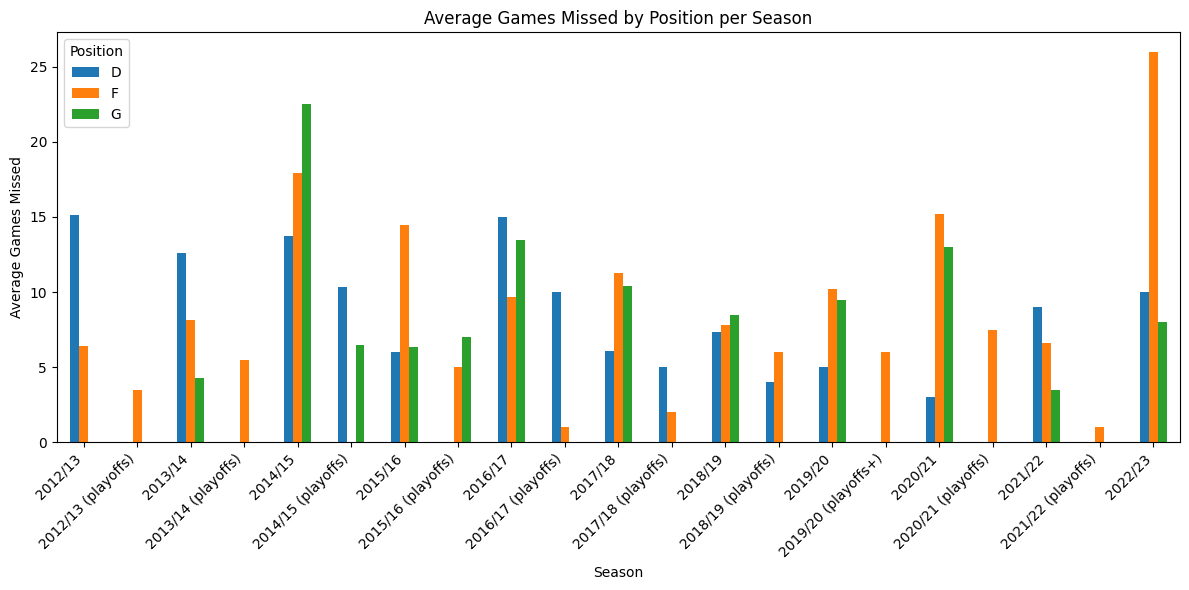

In [219]:
pivot = df.pivot_table(values='Games Missed', index='Season', columns='Position', aggfunc='mean')

pivot.plot(
    kind='bar',
    figsize=(12, 6),
    title='Average Games Missed by Position per Season'
)

plt.xlabel('Season')
plt.ylabel('Average Games Missed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* This model highlights the average recovery time (games missed) by position per season. When we look as chart, we can see that on average, the position "Forward" requires the most recovery time for a suffered concussion. This again lines up with the ideo that players with a "higher contact" position require longer recovery periods. 

Position
F    27
D    12
G     5
Name: count, dtype: int64


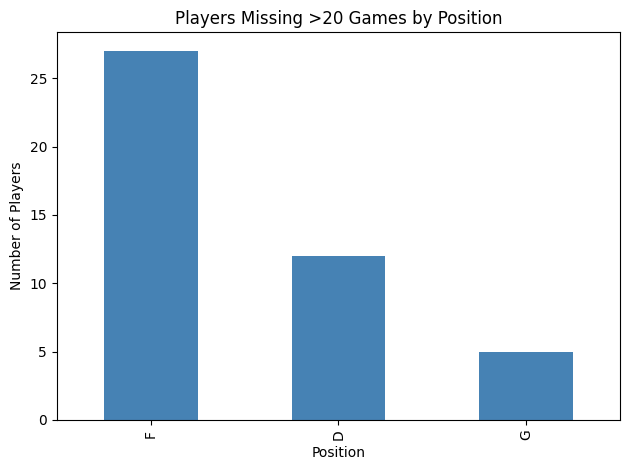

In [231]:
high_absence = df[df['Games Missed'] > 20]
high_absence_by_position = high_absence['Position'].value_counts()
print(high_absence_by_position)

high_absence_by_position.plot(kind='bar', title='Players Missing >20 Games by Position', color='steelblue')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

* Looking at this chart, we are analyzing the amount of players per position that are missing more than 20 games due to a concussion. This plot shows by a clear dividend that "Forwards" are missing the most games due to concussions with 27 players. Followed by "Defenseman" with 12 players and "Goalies" with 5 players. 

In [211]:
team_position = df.groupby(['Team', 'Position'])['Games Missed'].mean().unstack()
print("Average games missed by team and position:")
print(team_position.head())

Average games missed by team and position:
Position          D          F    G
Team                               
Anaheim   33.000000  16.400000  2.5
Arizona    1.000000   2.500000  NaN
Boston    11.857143   4.928571  2.0
Buffalo    6.000000   5.250000  4.0
Calgary         NaN   6.250000  NaN


* Lastly, we can use hierarchical grouping to explore team dynamics and its effects on concussion recovery. For example, while Anaheim has an average of 33 games missed, Arizona has a smaller average recovery time of just 1 game. This raises the question of if concussion protical varies between teams.

----

#### Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;This analysis explored concussion patterns in the NHL from 2012 to 2023 using a dataset of recorded injuries and player recovery times. By utilizing tools from course modules, we were able to answer our two research questions:
* Are certain positions (forward, defensemen, goalies, etc.) more prone to concussions?
* Is there a correlation between concussion frequency and player recovery?

&nbsp;&nbsp;&nbsp;&nbsp;To answer our first question, yes, forwards experience the most concussions by far (234), followed by defensemen (122), and with goalies affected the least (48). Forwards suffer from the most physical demands and exposure to contact. With more "bumps, blows or jolts" to the brain, it makes sense that a forward would reak the most consequences. Secondly, "Is there a relationship between player position and recovery times", I would conclude this as being undetermined. While forwards on average had the longest recovery time with approximately 10.4 games, the margin was too similar to the averages of defensemen (approximately 9.8) and goalies (approximately 9.04).

&nbsp;&nbsp;&nbsp;&nbsp;In comparison, we see that forwards have the most players that miss more than 20 games due to a concussion with 27 players, followed by defensemen with 12 players, and goalies with 5 players. In a study by Kristen A Scopaz and John Hatzenbuehler, published by the National Library of Medicine, they found that indivuals with a history of concussions have the most "risk factors" which could have a correlation with prolongued recovery. In future studies, I would love to explore concussion history with recovery times. 

----

#### Sources

[Risk Modifiers for Concussion and Prolonged Recovery](https://pmc.ncbi.nlm.nih.gov/articles/PMC3806172/)

[Concussion](https://www.mayoclinic.org/diseases-conditions/concussion/symptoms-causes/syc-20355594)

[Brain Metrics](https://www.nature.com/scitable/blog/brain-metrics/are_there_really_as_many/)

----